In [6]:
import pandas as pd
import os
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats


In [7]:
def make_data():
    init = pd.read_pickle(os.path.join(os.getcwd(),"paper_subset/1708.pkl"))
    final = pd.DataFrame(columns=init.keys())
    files = os.listdir(os.path.join(os.getcwd(),'paper_subset'))
    for file in files[1:]:
        if file.endswith(".pkl"):
            temp = pd.read_pickle(os.path.join(os.getcwd(),'paper_subset/'+file))
            final = pd.concat([final, temp])
    return final
    
papers_df = make_data()
papers_df

,paperId,title,year,citationCount,externalIds.DOI,keywords,authorIds,author_fields
1733874,29e01b2f3beacd67033d3c4d90cc2fa2e3f80801,FRAGEN,1708,0.0,10.1007/978-3-531-19901-6_4,[],[46564370],[Economics]
2136477,43bba6631b3d74d34d5942c2cab71409a1b9f8ce,FAUST,1791,63.0,10.1007/978-3-476-99297-0_8,[],[2052703034],[Linguistics]
2124537,45214c57d7e67dbc08c21472b912c05dff30421e,Errata,1799,0.0,10.1177/00220345770560042001,[Biology],[5629680],[Medicine]
754206,5ddcc9eff9c4f8e559d83457366b15e13b5f0e78,"XXI. Description of a large Species of Rat, a ...",1804,1.0,10.1111/J.1096-3642.1804.TB00297.X,[],[5035526],[Psychology]
13387,6762672c44e030c8754b7676197a0a645e923b74,Book Reviews,1805,0.0,10.1007/s12138-003-0005-1,[Education],[52356613],[History]
...,...,...,...,...,...,...,...,...
2642454,ed4f2dc3d9a9dbe4edc6af33c64b85301288f424,Assessment of oppositional defiant disorder an...,2023,0.0,10.3389/fpsyt.2022.1062201,"[Psychology, Medicine]",[35123009],[Medicine]
2644388,16cd6653f741db540f4d9daa525ca1deff2132ae,Revisiting Cellular Throughput Prediction: Lea...,2023,0.0,NaN,[Computer Science],[1708109],[Computer Science]
2644389,b856f7f55a1dbae5e9ef0e52c801b3ff5126a5f9,Self-medication practices with antibiotics amo...,2023,0.0,10.3126/ajms.v14i1.47836,[Medicine],[1708109],[Computer Science]
2644859,c84efe86ae773619c49d18e1212b98de334e0282,Spatial transcriptomics analysis of neoadjuvan...,2023,0.0,10.1101/2023.01.10.523481,"[Biology, Medicine]",[5962503],[Biology]


In [8]:
CSS_fields = ('Political Science', 'Sociology', 'Economics')
quantitative_fields = ('Mathematics', 'Physics', 'Computer Science')

papers_df = papers_df[papers_df['keywords'].apply(lambda x: any(field in x for field in CSS_fields))]
papers_df = papers_df[(papers_df['keywords'].apply(lambda x: any(field in x for field in quantitative_fields))) | 
                          (papers_df['author_fields'].apply(lambda x: any(field in x for field in quantitative_fields)))]
papers_df = papers_df[papers_df['keywords'].apply(lambda x: 'Biology' not in x)]
papers_df = papers_df[papers_df['authorIds'].apply(lambda x: len(x)) < 10]
papers_df = papers_df[papers_df['year'].apply(lambda x: x > 2018)]
papers_df = papers_df[papers_df['externalIds.DOI'].notna()]
ccs_papers = papers_df
ccs_papers

,paperId,title,year,citationCount,externalIds.DOI,keywords,authorIds,author_fields
2962,1d39a73c3fa13c1370d59ad10837f4c0b7bd90f0,A Better Algorithm for Societal Tradeoffs,2019,2.0,10.1609/AAAI.V33I01.33012229,"[Computer Science, Economics]","[1749906, 145215470]","[Economics, Computer Science]"
2963,71c55cde2440ad891b2fe86453fe06c5041ac37e,Group Fairness for the Allocation of Indivisib...,2019,40.0,10.1609/aaai.v33i01.33011853,"[Economics, Computer Science]","[1749906, 4006636]","[Economics, Computer Science]"
9191,1de6c69b59d792cde7697e6587a1cf9a95a6e0d9,Communicating to and engaging with the public ...,2019,13.0,10.2903/j.efsa.2019.e170717,[Political Science],"[2108112251, 40016674]","[Medicine, Computer Science]"
11888,4b04a7efebe33d011811498b6b7e823db7d4092a,Measuring and Mitigating Behavioural Segregati...,2019,3.0,10.1007/978-3-030-12554-7_15,[Political Science],"[2070693475, 1390131709, 1390131683]","[Computer Science, Computer Science, Computer ..."
12838,c125475b10c26561ed5a51f8ef2321748b2fe769,Community Engagement during outbreak response:...,2019,10.0,10.1101/661959,[Political Science],"[34207642, 39954198, 1387936232, 2504446, 4314...","[Medicine, Medicine, Computer Science, Medicin..."
...,...,...,...,...,...,...,...,...
2064916,578fb45ad750ad82b65d5568df8dcd6e88e237d9,Bayesian design of multi-regional clinical tri...,2023,0.0,10.1111/biom.13820,[Economics],[143851593],[Mathematics]
2087435,560187c6ca3c7248e7226ae0704241f7fe2e3ae2,Bimodal lobbying and trade policy outcomes: Ev...,2023,0.0,10.1057/s42214-022-00145-w,[Economics],[2909575],[Computer Science]
2312957,59fede767933818e5de9c5f5fdaf2e7733bd730e,Is cooperation sustained under increased mixin...,2023,0.0,10.1016/j.amc.2022.127604,[Economics],[1689559],[Computer Science]
2386671,1cc8ece6cffe84e38b104f58f38884d92674e1f1,Visualizing the knowledge structure of anti-mo...,2023,0.0,10.1117/12.2655909,[Economics],[5524736],[Computer Science]


In [9]:
#number of unique authors in the css_papers df:
unique_authors = ccs_papers['authorIds'].explode().unique()
len(unique_authors)

5884

### Exercise 2: CSS Graph

In [10]:
from itertools import combinations
from collections import Counter

# create list of all unique name combinations
name_combinations = []
for names in ccs_papers['authorIds']:
    name_combinations.extend(list(combinations(names, 2)))
unique_combinations = list(set(name_combinations))

# count occurrences of each unique name combination
name_counts = Counter(name_combinations)

# create final dataframe
result_df = pd.DataFrame({'Name 1': [c[0] for c in unique_combinations],
                          'Name 2': [c[1] for c in unique_combinations],
                          'Count': [name_counts[c] for c in unique_combinations]})
#result_df

In [11]:
edge_list = list(result_df.to_records(index=False))
#edge_list

In [12]:
G = nx.Graph()
G.add_weighted_edges_from(edge_list)

In [13]:
df_authors = pd.read_pickle(os.path.join(os.getcwd(),'author_subset.pkl'))
df_authors

#create new column with longest alias:
#df_authors['longest_alias'] = df_authors['aliases'].apply(lambda x: max(x, key=len)) 

#create new column with longest alias, while ignoring None type values:
#df_authors['longest_alias'] = df_authors['aliases'].apply(lambda x: max([name for name in x if name is not None], key=len) if x else None)

#Here it starts to get tricky to interpret what's happening but it works. Create new column with longest alias, while ignoring None type values. If the values are none, take name in the name column:
df_authors['longest_alias'] = df_authors.apply(lambda row: max([name for name in row['aliases'] if name is not None], key=len) if row['aliases'] else row.at['name'], axis=1)

df_authors

,authorId,name,aliases,citationCount,top_field,longest_alias
0,1779533,N. Mavridis,"[N. Mavridis, Nikolaos Antar Mavridis, Nikolao...",2231,Computer Science,Nikolaos Antar Mavridis
0,3166734,R. Hogarth,"[R. M. Hogarth, Robin M. Hogarth, Robin Hogart...",20586,Psychology,Robert M. Hogarth
0,1801245727,Jean-Pierre Chevrot,[Jean Pierre Chevrot],610,Linguistics,Jean Pierre Chevrot
0,1788563,Ella Haig,"[M Cocea, Mihaela Cocea]",1991,Computer Science,Mihaela Cocea
0,143886606,Saquib Razak,None,312,Computer Science,Saquib Razak
...,...,...,...,...,...,...
0,72048244,Rachel Krohn,[Rachel. Krohn],28,Computer Science,Rachel. Krohn
0,123416689,Friedrich Kurrent,None,0,NaN,Friedrich Kurrent
0,66245363,J. Morris,"[J Morris, J. C. Moreno C. Morris, John Morris]",430,Medicine,J. C. Moreno C. Morris
0,11619416,Lang-ping Wang,"[Lang Ping Wang, Lang-ping Wang, Langping Wang]",675,Materials Science,Lang Ping Wang


In [29]:
alias_dict = dict(zip(df_authors['authorId'], df_authors['longest_alias']))
top_field_dict = dict(zip(df_authors['authorId'], df_authors['top_field']))

nx.set_node_attributes(G, alias_dict, 'name')
nx.set_node_attributes(G, top_field_dict, 'top_field')

In [30]:
#create a new dataframe for Exercise 2.3. 
# Explode list column into separate rows
df_exploded = ccs_papers.explode('authorIds')

# Calculate mean, min, and max for each integer
new_df = df_exploded.groupby('authorIds')['year'].agg(['min', 'size']).reset_index()
new_df['medianCitationCount'] = df_exploded.groupby('authorIds')['citationCount'].agg(['median']).reset_index()['median']
new_df['totalCitationCount'] = df_exploded.groupby('authorIds')['citationCount'].agg(['sum']).reset_index()['sum']

new_df = new_df.rename({'min': 'firstPubl', 'size': 'numbPubl'}, axis=1)
new_df

,authorIds,firstPubl,numbPubl,medianCitationCount,totalCitationCount
0,10016451,2020,1,0.0,0.0
1,100488934,2021,2,4.0,8.0
2,100525940,2022,1,0.0,0.0
3,10054843,2020,1,1.0,1.0
4,100586619,2019,1,0.0,0.0
...,...,...,...,...,...
5879,98915591,2019,1,1.0,1.0
5880,9898994,2021,1,3.0,3.0
5881,9910998,2020,2,33.0,66.0
5882,9957987,2019,2,10.5,21.0


In [31]:
firstPubl_dict = dict(zip(new_df['authorIds'], new_df['firstPubl']))
numbPubl_dict = dict(zip(new_df['authorIds'], new_df['numbPubl']))
medianCitationCount_dict = dict(zip(new_df['authorIds'], new_df['medianCitationCount']))
TotalCitationCount_dict = dict(zip(new_df['authorIds'], new_df['totalCitationCount']))


nx.set_node_attributes(G, firstPubl_dict, 'first_publication_year')
nx.set_node_attributes(G, numbPubl_dict, 'number_of_publications')
nx.set_node_attributes(G, medianCitationCount_dict, 'median_citation_count')
nx.set_node_attributes(G, TotalCitationCount_dict, 'total_citation_count')

In [32]:
#Some commands to inspect the created graph
#list(G.nodes)
#list(G.edges)
#G.degree['2124257085']
#print(G.nodes['2076751932']['name'])  #no name was assigned as the author was likely not in the author dataframe
print(G.nodes['2798221']['name'] + ', ' + G.nodes['2798221']['top_field']) #name was assigned instead of alias
print(G.nodes['51428797']['name'] + ', ' + G.nodes['51428797']['top_field']) 
print(G.nodes['51428797']['first_publication_year'])
print(G.nodes['51428797']['number_of_publications'])
print(str(G.nodes['51428797']['median_citation_count']))

Kokil Jaidka, Computer Science
Mykola Makhortykh, Computer Science
2019
13
4.0


## Part 4: Preliminary analysis of the Computational Social Scientists

1. Why do you think I want you guys to use an undirected graph? Could have we used an directed graph instead?

Authors that work together is inherently an undirected relationship. It's hard to imagine a use-case for directed graphs in this context.

2. What is the total number of nodes in the network? What is the total number of links? What is the density of the network (that is the total number of links over the maximum number of links)?

In [34]:
print('number of nodes: ' + str(len(list(G.nodes))))
print('number of edges: ' + str(len(list(G.edges))))
density = nx.density(G)
print('density of the network: ' + str(density))

number of nodes: 5045
number of edges: 10921
density of the network: 0.0008583336804603139


3. What are the average, median, mode, minimum and maximum value of the degree? What are the average, median, mode, minimum and maximum value of the nodes strength? How do you intepret the results?

In [35]:
# compute degree for each node
degrees = list(dict(nx.degree(G)).values())

# compute strength for each node
strengths = list(dict(nx.degree(G, weight='weight')).values())

# compute and print statistics for degrees
print("Degree statistics:")
print("Mean: ", np.mean(degrees))
print("Median: ", np.median(degrees))
print("Mode: ", stats.mode(degrees)[0][0])
print("Minimum: ", np.min(degrees))
print("Maximum: ", np.max(degrees))

# compute and print statistics for strengths
print("Strength statistics:")
print("Mean: ", np.mean(strengths))
print("Median: ", np.median(strengths))
print("Mode: ", stats.mode(strengths)[0][0])
print("Minimum: ", np.min(strengths))
print("Maximum: ", np.max(strengths))

Degree statistics:
Mean:  4.329435084241823
Median:  3.0
Mode:  1
Minimum:  1
Maximum:  77
Strength statistics:
Mean:  5.453320118929633
Median:  4.0
Mode:  1
Minimum:  1
Maximum:  99


C:\Users\Ejer\AppData\Local\Temp\ipykernel_19368\226989820.py:11: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  print("Mode: ", stats.mode(degrees)[0][0])
C:\Users\Ejer\AppData\Local\Temp\ipykernel_19368\226989820.py:19: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

On average an author has published papers with approx. 3 other authors in the database. Given that the median of the degrees is close to the mean, it seems that there are not that many authors that collaborated with extreme amounts of authors. Therefore, not as heavy-tailed as what we have seen in previous weeks.

In undirected graphs, the strength can be calculated as the sum of the connectivity weights of the edges attached to each node. Given that many author collaborations lead to more than just one publication, these statistic values for strength are all higher than the ones for the degree (as minimum weight = 1). The authors in our dataset have on average collaborated with other authors on 6.5 papers. The median remained the same. Probably given that most authors only are represented by one paper in our dataset. Thus they only had one collaboration. The mean and median of the distribution of the strength are a bit further appart, indicating that the distribution became slightly more heavy tailed. When the number of publications between each collaboration is taken into account, the "experienced" authors that publish a lot influence the mean more significantly.


4. List the top 5 authors by degree. What is their total number of citations?


In [36]:
top_nodes = sorted(G, key=G.degree, reverse=True)[:5]
print(top_nodes)

['1682773', '1684687', '2504674', '80273596', '145320204']


In [37]:
citation_sum = sum([G.nodes[node]["total_citation_count"] for node in top_nodes])
print("Sum of citationCounts of top nodes:", citation_sum)

Sum of citationCounts of top nodes: 1197.0


In [38]:
print('\n'.join([f"Node {node} {'name'}: {G.nodes[node]['name']}" for node in top_nodes]))
#print('\n'.join([f"{G.nodes[node]['name']}" for node in top_nodes]))

Node 1682773 name: Alexander Sandy Pentland
Node 1684687 name: Ingmar G. Weber
Node 2504674 name: Daniela Paolotti
Node 80273596 name: Alessandro Vespignani
Node 145320204 name: Carlo F. Ratti


5. Look them up online. What do they work on?

Iyad Rahwan: An Associate Professor at MIT Media Lab, Rahwan's research focuses on artificial intelligence, machine learning, multi-agent systems, and computational social science. His work aims to understand and address the social and ethical implications of autonomous systems and artificial intelligence.

Manlio De Domenico: A physicist and computer scientist, De Domenico's research interests include network science, computational social science, and data-driven modeling of complex systems. He works on developing mathematical and computational tools to study complex networks and their dynamics, and applies them to various areas, such as social networks, transportation systems, and biological networks.

Andrea Baronchelli: A physicist and network scientist, Baronchelli's research focuses on understanding the structure and dynamics of complex networks, such as social networks, transportation networks, and biological networks. He develops mathematical and computational models to study these networks and their behavior, with the aim of uncovering fundamental principles that govern complex systems.

Guillaume Cabanac: An information scientist, Cabanac's research interests include bibliometrics, scientometrics, and information retrieval. He works on developing algorithms and tools to analyze scientific publications and their impact, with the aim of improving the quality and efficiency of scientific research. His work also explores the social and ethical implications of the use of bibliometric indicators in scientific evaluation.

6. Plot the distribution of degrees, using appropriate binning. What do you observe?

In [39]:
import matplotlib as mpl
import math
def setup_mpl():
    #mpl.rcParams['font.family'] = 'Times New Roman'
    mpl.rcParams['font.size'] = 11
    mpl.rcParams['figure.figsize'] = (7,2.5)
    mpl.rcParams['figure.dpi'] = 300
    
setup_mpl()

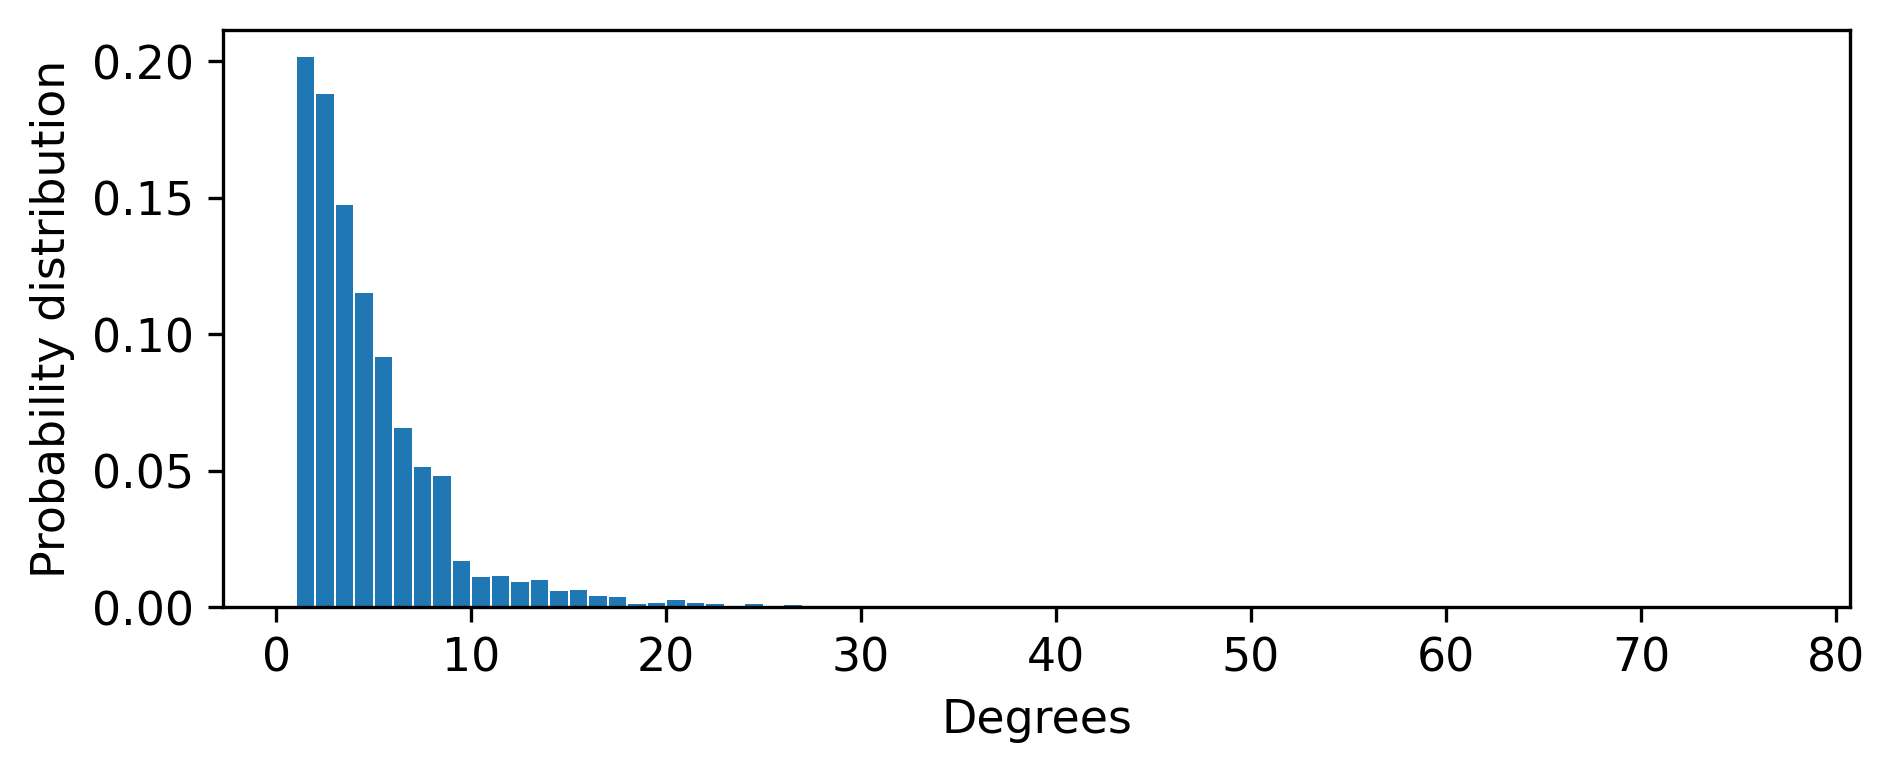

In [40]:
X = degrees
x_log = False
y_log = False
bar_hist = True

# Create histogram
bins = np.linspace(math.floor(min(X)), math.ceil(max(X)), math.ceil(max(X)))
if x_log:
    bins = np.logspace(0, np.log10(math.ceil(max(X))), math.ceil(max(X)))
hist, edges = np.histogram(X, bins = bins, density = True) #change density to false if you want y = count (instead of probability distribution))
x = (edges[1:]+edges[:-1])/2
width = bins[1]-bins[0]

fig, ax = plt.subplots()
if bar_hist:
    ax.bar(x, hist, width = width *0.9)
else:
    ax.plot(x, hist, marker = '.')

ax.set_xlabel('Degrees')
ax.set_ylabel('Probability distribution')
if x_log:
    ax.set_xscale('log')
if y_log:
    ax.set_yscale('log')   

7. Plot a scatter plot of the the degree versus the "median number of citations" per ccs paper for all authors. Use logarithmic axes where appropriate. Compute the spearman correlation between the two.

In [41]:
Y = [G.nodes[node]['median_citation_count'] for node in G.nodes()]

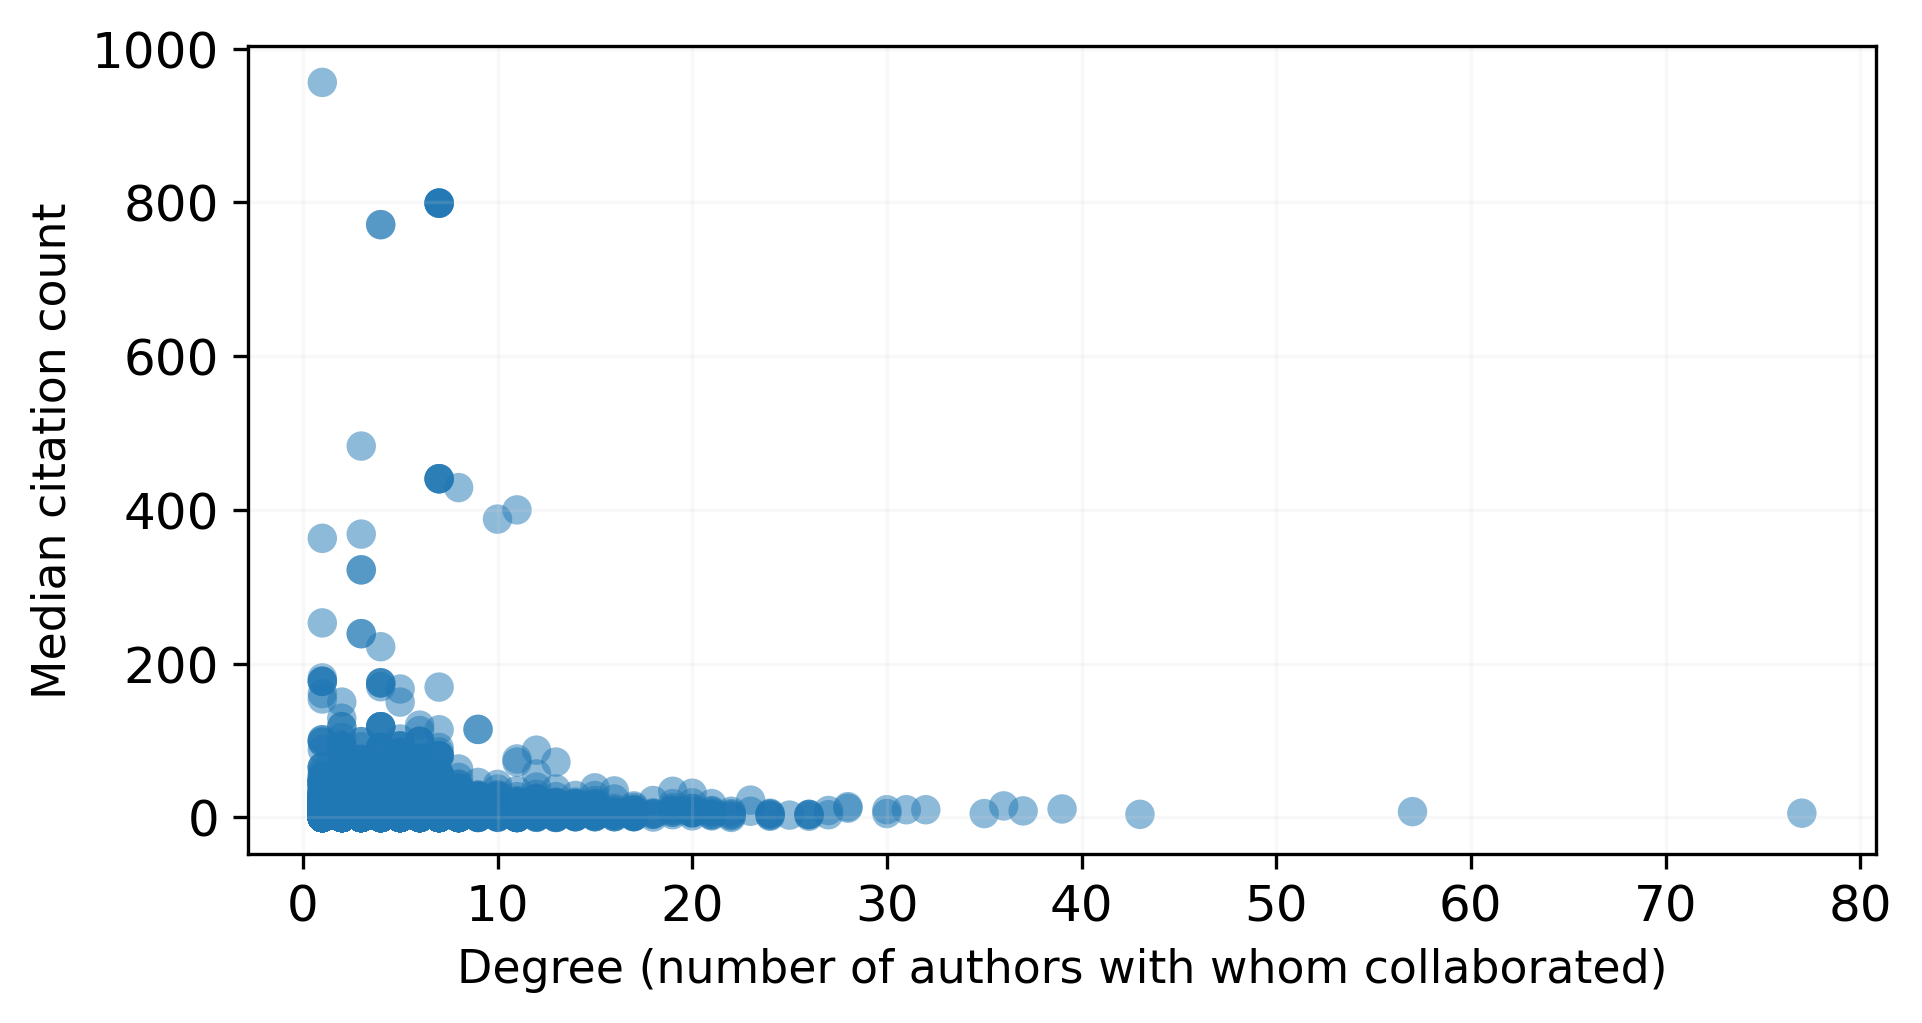

In [42]:
### Create the scatterplot
fig, ax = plt.subplots()
ax.scatter(X, Y, s=50, alpha=0.5, edgecolors='none')

fig.set_figheight(3.5)

# Set the plot title and axis labels
ax.set_xlabel('Degree (number of authors with whom collaborated)')
ax.set_ylabel('Median citation count')

# Customize the tick labels
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=10)

# Customize the plot grid
ax.grid(True, which='both', color='lightgrey', alpha=0.15) 
# Show the plot
plt.show()

In [43]:
stats.spearmanr(X,Y)

SpearmanrResult(correlation=0.14161609927025468, pvalue=5.1322603730153696e-24)

8. Bin your degrees using the bins in point 6. and compute the 25th, 50th, and 75th percentile in each bin. Add the result to your figure as a line plot with errorbars (the median value is the line plot, and the 25th and 75th percentiles are the errorbars).

"\n# calculate percentiles for each bin\npct25 = []\npct75 = []\nX_arr = np.array(X) # Convert lists to NumPy arrays\nY_arr = np.array(Y) # Convert lists to NumPy arrays\nfor i in range(len(bins)-1):\n    bin_data = Y_arr[(X_arr >= bins[i]) & (X_arr < bins[i+1])]\n    try:\n        pct25.append(np.percentile(bin_data, 25))\n        pct75.append(np.percentile(bin_data, 75))\n    except:\n        pct25.append(0)\n        pct75.append(0)\n        \npct25 = [x / 2 for x in pct25]\npct75 = [x / 2 for x in pct75]\n\npct25_diff = hist - pct25\npct75_diff = pct75-hist\nerrorbar = plt.errorbar(x = bins[:-1] + 0.5, y=hist, yerr=np.vstack((pct25_diff, pct75_diff)), color='black', capsize= 3, capthick=0.75, elinewidth=0.75, label='Median and 25 and 75th percentile')\n\nhandles = [barplot, errorbar]\nlabels = [h.get_label() for h in handles]\nax.legend(handles, labels, loc='upper right')\n"

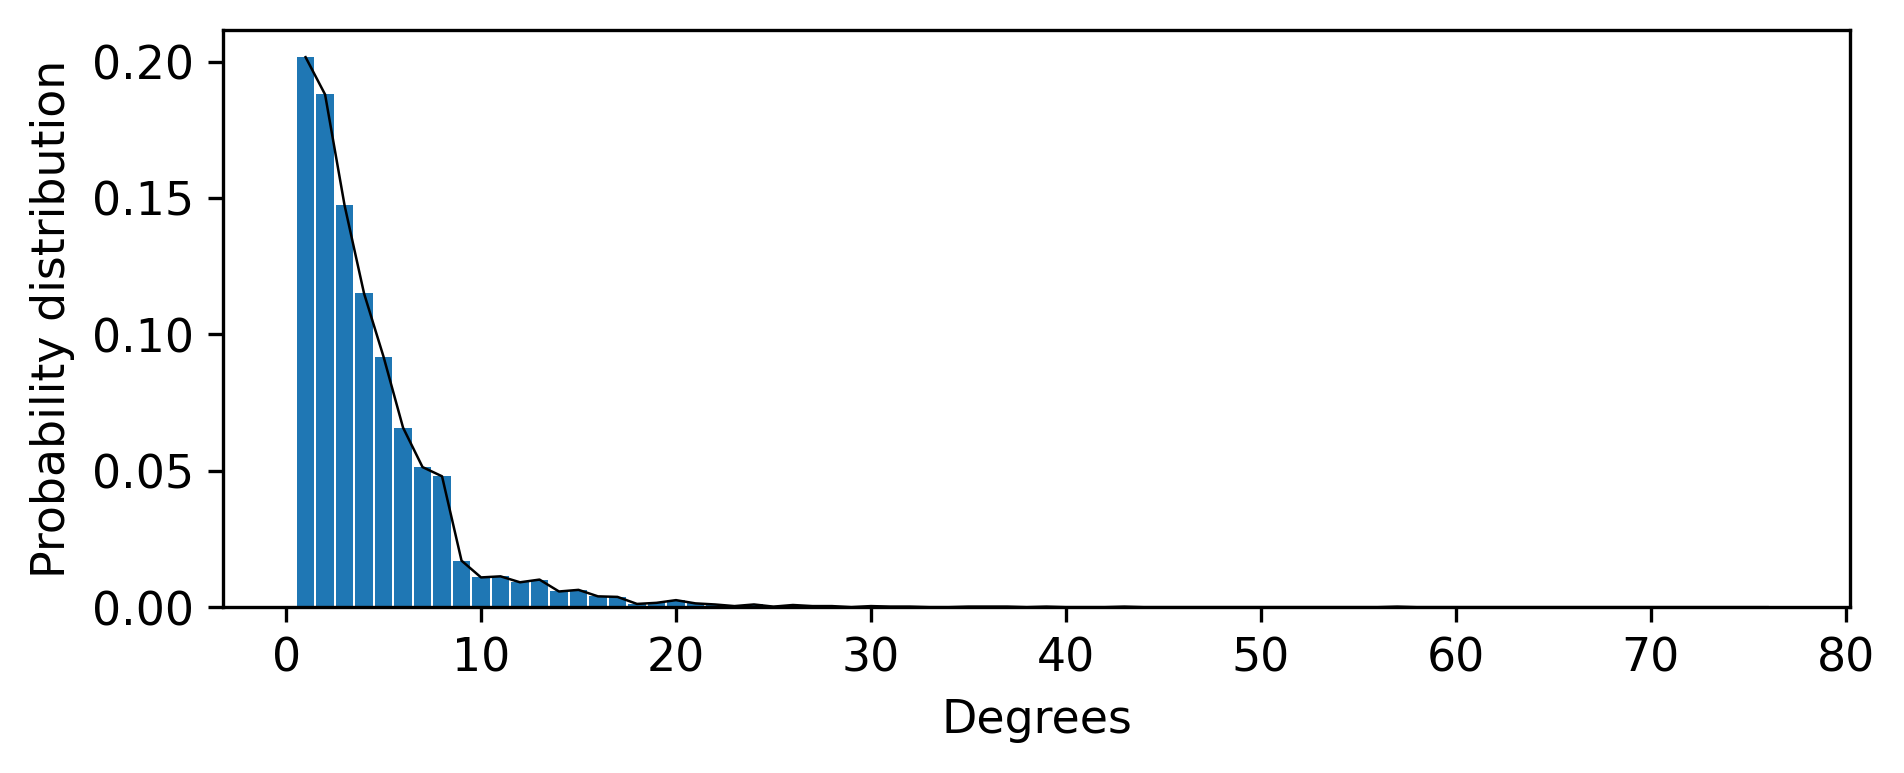

In [44]:
X = degrees
x_log = False
y_log = False
bar_hist = True

# Create histogram
bins = np.linspace(math.floor(min(X))-0.5, math.ceil(max(X))-0.5, math.ceil(max(X))) # creates bins, shifted by 0.5 to have them centered on integer numbers (so we don't have 1.2 degrees, etc.)
if x_log:
    bins = np.logspace(0, np.log10(math.ceil(max(X))), math.ceil(max(X)))
hist, edges = np.histogram(X, bins = bins, density = True) #change density to false if you want y = count (instead of probability distribution))
x = (edges[1:]+edges[:-1])/2
width = bins[1]-bins[0]

fig, ax = plt.subplots()
if bar_hist:
    barplot = ax.bar(x, hist, width = width *0.9, label='Probability distribution')
else:
    ax.plot(x, hist, marker = '.')

ax.set_xlabel('Degrees')
ax.set_ylabel('Probability distribution')
if x_log:
    ax.set_xscale('log')
if y_log:
    ax.set_yscale('log')

lineplot = plt.plot(bins[:-1] + 0.5, hist, color='black', linewidth=0.6, label='Median')

"""
# calculate percentiles for each bin
pct25 = []
pct75 = []
X_arr = np.array(X) # Convert lists to NumPy arrays
Y_arr = np.array(Y) # Convert lists to NumPy arrays
for i in range(len(bins)-1):
    bin_data = Y_arr[(X_arr >= bins[i]) & (X_arr < bins[i+1])]
    try:
        pct25.append(np.percentile(bin_data, 25))
        pct75.append(np.percentile(bin_data, 75))
    except:
        pct25.append(0)
        pct75.append(0)
        
pct25 = [x / 2 for x in pct25]
pct75 = [x / 2 for x in pct75]

pct25_diff = hist - pct25
pct75_diff = pct75-hist
errorbar = plt.errorbar(x = bins[:-1] + 0.5, y=hist, yerr=np.vstack((pct25_diff, pct75_diff)), color='black', capsize= 3, capthick=0.75, elinewidth=0.75, label='Median and 25 and 75th percentile')

handles = [barplot, errorbar]
labels = [h.get_label() for h in handles]
ax.legend(handles, labels, loc='upper right')
"""

9. Why do you think I wanted you guys to use the Spearman correlation (instead of the usual Pearson correlation)?

10. Comment on your results. Do you observe any relation? If yes, what could be the underlying reason, and how could you further explore possible reasons? If not, why do you think that is the case?

In [45]:
#save graph for using it in week 5
nx.write_gpickle(G, "css_graph.gpickle")